In [1]:
cd C:/Users/Watson Turbo/Desktop

C:\Users\Watson Turbo\Desktop


In [2]:
pwd

'C:\\Users\\Watson Turbo\\Desktop'

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Create dataframes from FRED data
cpi = pd.read_csv("CPI.csv")
wti = pd.read_csv("WTI.csv")
ind = pd.read_csv("Industrial Production.csv")
debt = pd.read_csv("Debt.csv")

In [6]:
cpi.head()

,Date,CPI
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [7]:
wti.head()

,Date,WTI
0,1/1/1947,1.62
1,2/1/1947,1.62
2,3/1/1947,1.62
3,4/1/1947,1.87
4,5/1/1947,1.87


In [8]:
ind.head()

,Date,Prod
0,1/1/1947,14.0679
1,2/1/1947,14.1510
2,3/1/1947,14.2341
3,4/1/1947,14.1233
4,5/1/1947,14.1787


In [9]:
debt.head()

,Date,Debt
0,1/1/1947,267.0
1,2/1/1947,268.8
2,3/1/1947,266.7
3,4/1/1947,265.0
4,5/1/1947,265.7


In [10]:
#Check date types
debt.dtypes, wti.dtypes, cpi.dtypes, ind.dtypes

(Date     object
 Debt    float64
 dtype: object, Date     object
 WTI     float64
 dtype: object, Date     object
 CPI     float64
 dtype: object, Date     object
 Prod    float64
 dtype: object)

In [11]:
#Convert Dates to be measurable
wti['Date'] = wti['Date'].astype('datetime64[ns]')
cpi['Date'] = cpi['Date'].astype('datetime64[ns]')
ind['Date'] = ind['Date'].astype('datetime64[ns]')
debt['Date'] = debt['Date'].astype('datetime64[ns]')

In [12]:
#Merge Dataframes based on Date
econ = pd.merge(wti, cpi)
econ = pd.merge(econ, ind)
econ = pd.merge(econ, debt)

In [13]:
econ.head()

,Date,WTI,CPI,Prod,Debt
0,1947-01-01,1.62,21.48,14.0679,267.0
1,1947-02-01,1.62,21.62,14.1510,268.8
2,1947-03-01,1.62,22.00,14.2341,266.7
3,1947-04-01,1.87,22.00,14.1233,265.0
4,1947-05-01,1.87,21.95,14.1787,265.7


In [14]:
#Explore Stats
econ.describe(include='all')

,Date,WTI,CPI,Prod,Debt
count,869,869.000000,869.000000,869.000000,869.000000
unique,869,NaN,NaN,NaN,NaN
top,1995-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,1947-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2019-05-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,25.269162,108.923838,58.640564,4597.646145
std,NaN,27.625947,76.907265,30.450577,6110.097682
min,NaN,1.620000,21.480000,13.569500,253.800000
25%,NaN,3.000000,31.280000,31.376000,308.900000


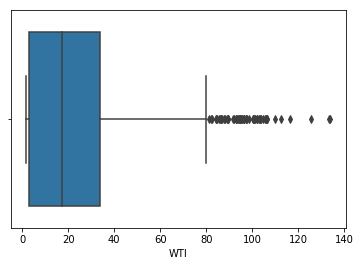

In [15]:
#Box Plot
sns.boxplot(x="WTI",data=econ)

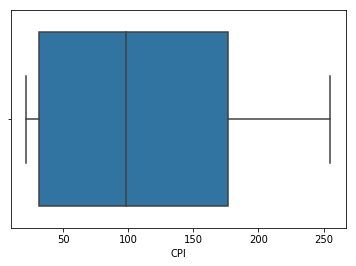

In [16]:
sns.boxplot(x="CPI",data=econ)

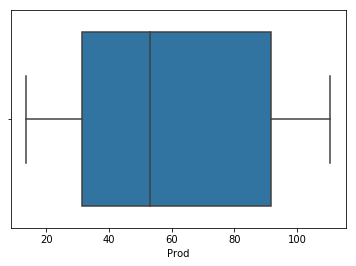

In [17]:
sns.boxplot(x="Prod",data=econ)

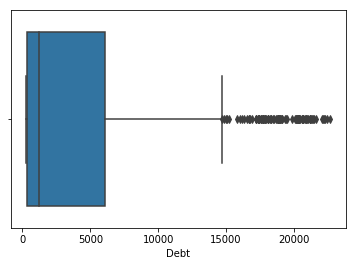

In [18]:
sns.boxplot(x="Debt",data=econ)

Interestingly enough, Debt and Oil boxplots show numerous outliers beyond the 75th percentile.

I would imagine these are both from recent spikes.

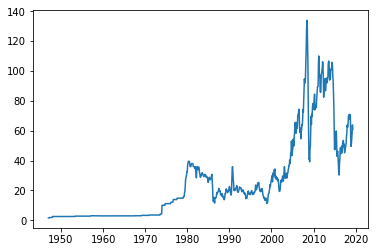

In [33]:
#Plot Oil Price with Matplotlib
from pandas import Series
x = econ['Date']
oil = econ['WTI']
plt.plot(x,oil)
plt.show()

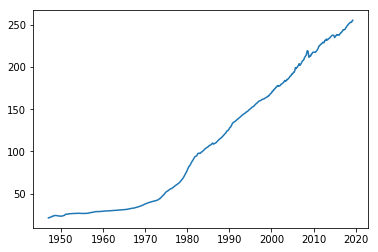

In [27]:
#Plot Inflation
cpi = econ['CPI']
plt.plot(x, cpi)
plt.show()

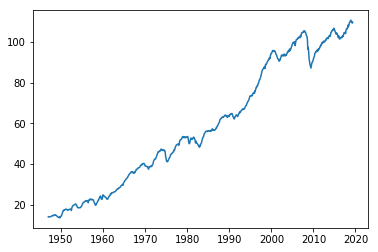

In [28]:
#Plot Industrial Production Index
prod = econ['Prod']
plt.plot(x, prod)
plt.show()

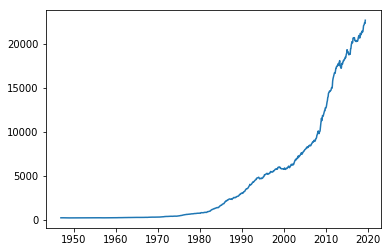

In [29]:
#Plot Federal Debt
debt = econ['Debt']
plt.plot(x, debt)
plt.show()

Everything seems fairly stationary except for Oil

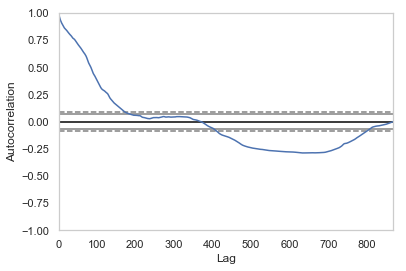

In [69]:
#Auto Correlation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oil)
plt.show()

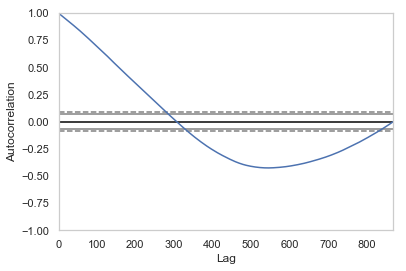

In [70]:
autocorrelation_plot(cpi)
plt.show()

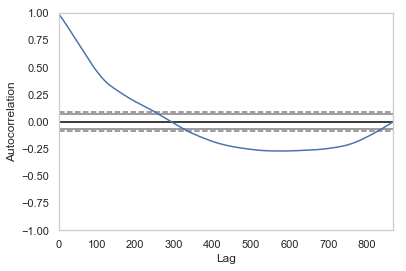

In [71]:
autocorrelation_plot(debt)
plt.show()

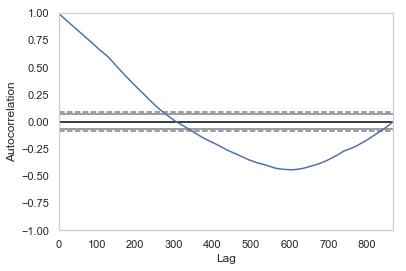

In [72]:
autocorrelation_plot(prod)
plt.show()

In [73]:
#Correlation Table
econ.corr()

,WTI,CPI,Prod,Debt
WTI,1.000000,0.839266,0.801016,0.814546
CPI,0.839266,1.000000,0.975032,0.903188
Prod,0.801016,0.975032,1.000000,0.840951
Debt,0.814546,0.903188,0.840951,1.000000


## Woah! All of these Economic Indicators are Highly correlated!

In [74]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [76]:
#Define Predictor Vairable X and Target Variable Y
x = econ[ ['WTI']]
y = econ[ ['CPI']]
#Fit the Model
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
#Obtain the prediction
Yhat=lm.predict(x)

In [85]:
#View Intercept and Slope
lm.intercept_, lm.coef_

(array([49.88460156]), array([[2.33641446]]))

In [ ]:
#OIl Price = 49.88- 2.34 * CPI

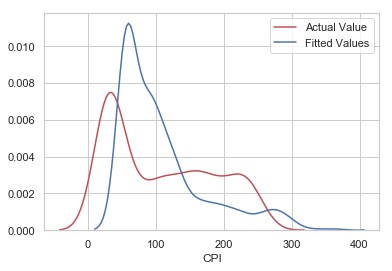

In [111]:
#Distribution Plot
ax1 = sns.distplot(econ['CPI'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

In [90]:
# P Value of same dataframe, note it should match the Correlation Table
from scipy import stats
pearson_coef, p_value = stats.pearsonr(econ['WTI'], econ['CPI'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8392661214888024  with a P-value of P = 1.2013961885775618e-231


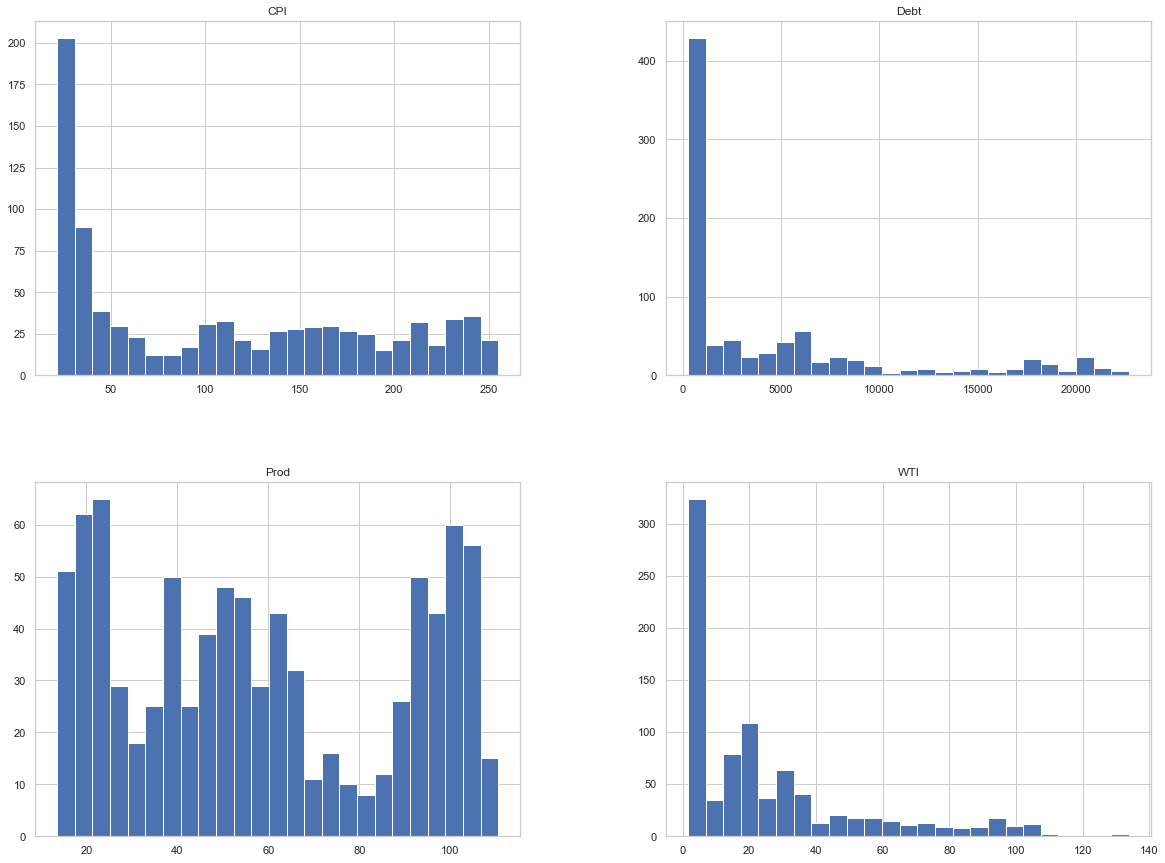

In [117]:
#Histogram
econ.hist(bins=25, figsize=(20,15))
plt.show()

(0, 414.12297111253076)

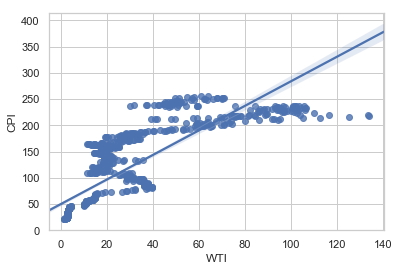

In [118]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 28450.84631574694)

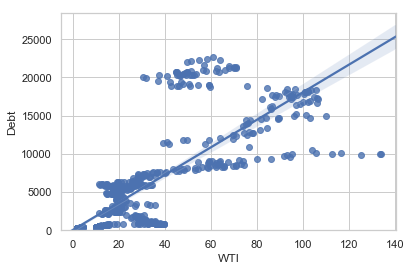

In [119]:
sns.regplot(x="WTI",y="Debt", data=econ)
plt.ylim(0,)

(0, 175.35040452887344)

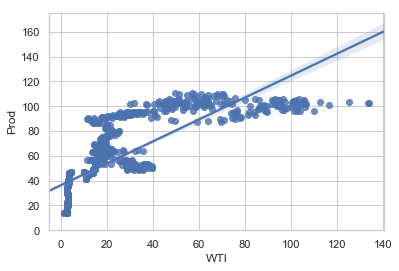

In [120]:
sns.regplot(x="WTI",y="Prod", data=econ)
plt.ylim(0,)

(0, 413.5176076517157)

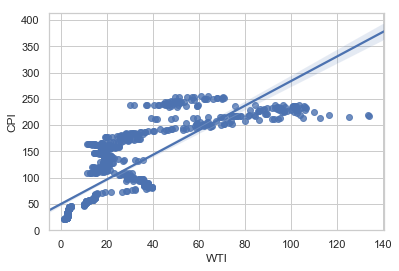

In [121]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 140.94201042509664)

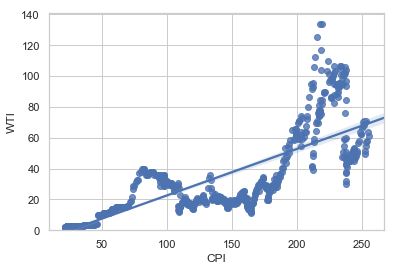

In [122]:
sns.regplot(x="CPI",y="WTI", data=econ)
plt.ylim(0,)

(0, 23978.98422592969)

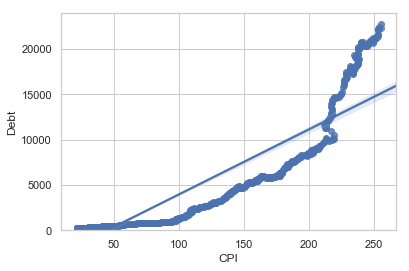

In [124]:
sns.regplot(x="CPI",y="Debt", data=econ)
plt.ylim(0,)

(0, 126.03420638913079)

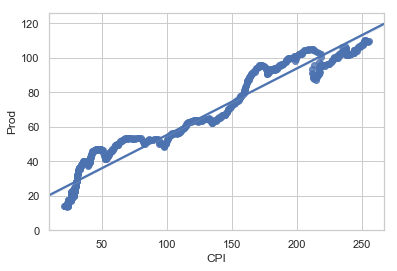

In [125]:
sns.regplot(x="CPI",y="Prod", data=econ)
plt.ylim(0,)

(0, 268.8967207091526)

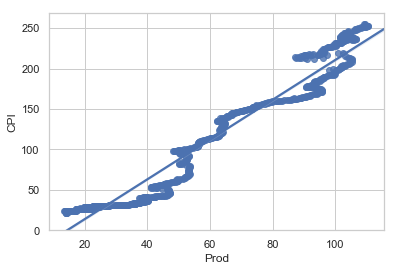

In [126]:
sns.regplot(x="Prod",y="CPI", data=econ)
plt.ylim(0,)

(0, 141.29271897124318)

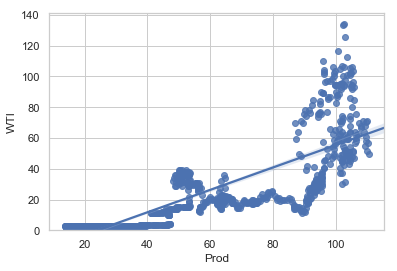

In [127]:
sns.regplot(x="Prod",y="WTI", data=econ)
plt.ylim(0,)

(0, 24052.088936707365)

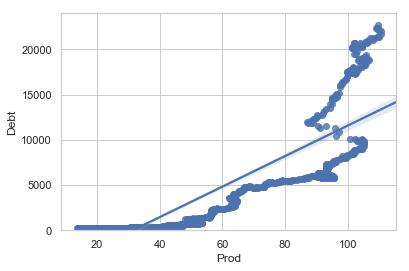

In [128]:
sns.regplot(x="Prod",y="Debt", data=econ)
plt.ylim(0,)

(0, 149.97286595533728)

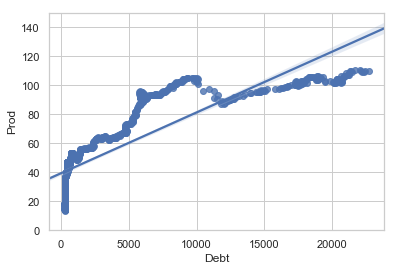

In [129]:
sns.regplot(x="Debt",y="Prod", data=econ)
plt.ylim(0,)

(0, 140.58768499769468)

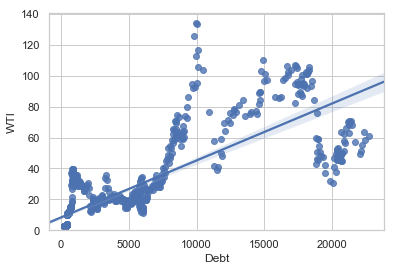

In [130]:
sns.regplot(x="Debt",y="WTI", data=econ)
plt.ylim(0,)

(0, 352.7146049378516)

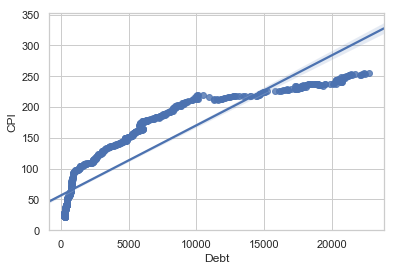

In [131]:
sns.regplot(x="Debt",y="CPI", data=econ)
plt.ylim(0,)

#Residual Plot to determine if Linear Regression is appropriate

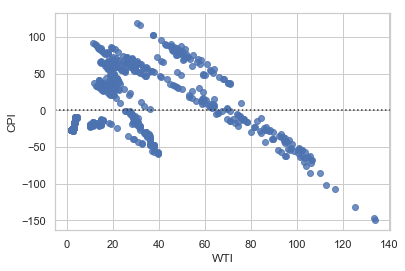

In [132]:
#
sns.residplot(econ['WTI'], econ['CPI'], robust=True)

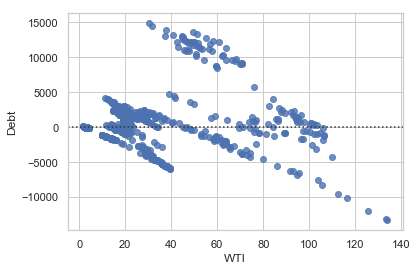

In [133]:
#
sns.residplot(econ['WTI'], econ['Debt'], robust=True)

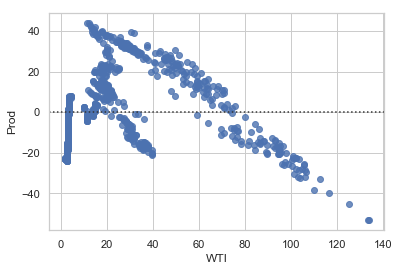

In [134]:
#
sns.residplot(econ['WTI'], econ['Prod'], robust=True)

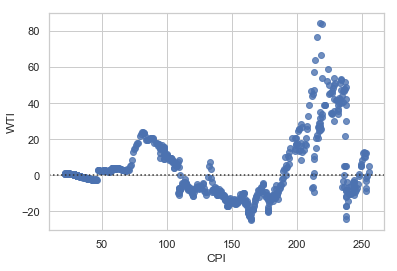

In [135]:
#
sns.residplot(econ['CPI'], econ['WTI'], robust=True)

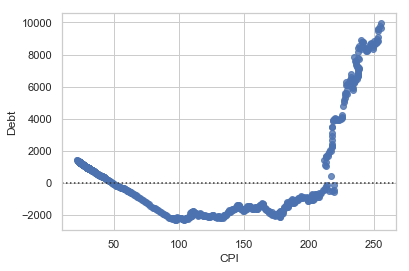

In [136]:
#
sns.residplot(econ['CPI'], econ['Debt'], robust=True)

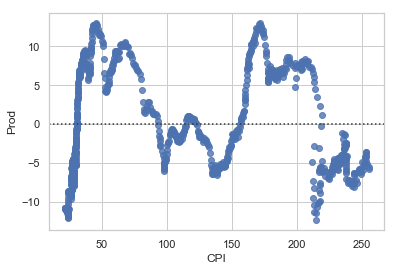

In [137]:
#
sns.residplot(econ['CPI'], econ['Prod'], robust=True)

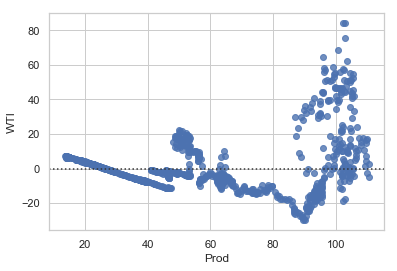

In [138]:
#
sns.residplot(econ['Prod'], econ['WTI'], robust=True)

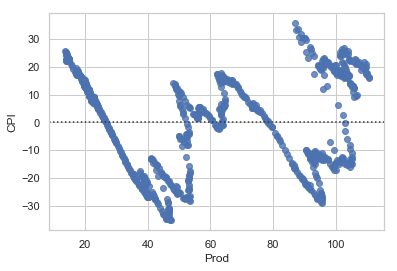

In [139]:
#
sns.residplot(econ['Prod'], econ['CPI'], robust=True)

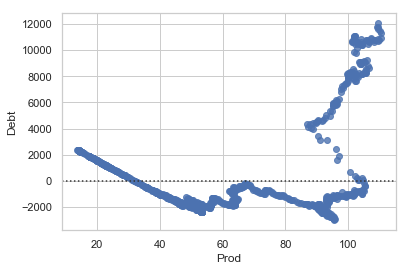

In [140]:
#
sns.residplot(econ['Prod'], econ['Debt'], robust=True)

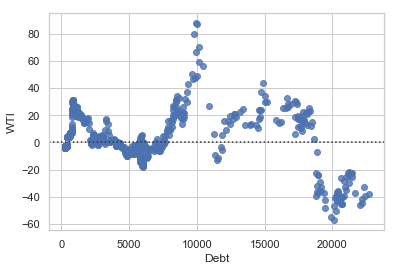

In [141]:
#
sns.residplot(econ['Debt'], econ['WTI'], robust=True)

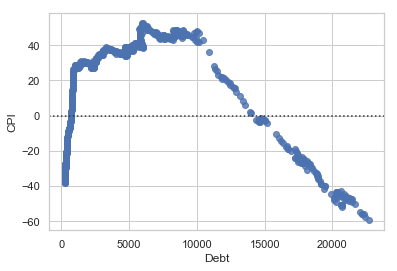

In [142]:
#
sns.residplot(econ['Debt'], econ['CPI'], robust=True)

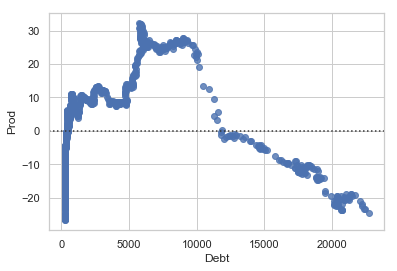

In [143]:
#
sns.residplot(econ['Debt'], econ['Prod'], robust=True)

In [144]:
#To call 5 highest Months of Oil Prices 
econ.nlargest(5, 'WTI')

,Date,WTI,CPI,Prod,Debt
737,2008-06-01,133.93,217.463,102.8445,9969.0
738,2008-07-01,133.44,219.016,102.3002,10045.5
736,2008-05-01,125.39,215.208,103.0863,9824.8
739,2008-08-01,116.61,218.690,100.7353,10134.7
735,2008-04-01,112.57,213.942,103.6704,9932.8


In [145]:
#To call 5 highest Months of Inflation
econ.nlargest(5, 'CPI')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
867,2019-04-01,63.86,254.958,109.1657,22346.6
866,2019-03-01,58.15,254.148,109.5985,22425.2
865,2019-02-01,54.95,253.113,109.4709,22221.4
861,2018-10-01,70.75,252.794,109.9165,21419.9


In [146]:
#To call 5 highest Months of Production
econ.nlargest(5, 'Prod')

,Date,WTI,CPI,Prod,Debt
863,2018-12-01,49.52,252.723,110.5516,22075.2
862,2018-11-01,56.96,252.760,110.5067,21683.9
864,2019-01-01,51.38,252.673,110.0907,22160.0
861,2018-10-01,70.75,252.794,109.9165,21419.9
860,2018-09-01,70.23,252.010,109.6749,21353.1


In [147]:
#To call 5 highest Months of Debt
econ.nlargest(5, 'Debt')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
866,2019-03-01,58.15,254.148,109.5985,22425.2
867,2019-04-01,63.86,254.958,109.1657,22346.6
865,2019-02-01,54.95,253.113,109.4709,22221.4
864,2019-01-01,51.38,252.673,110.0907,22160.0


In [150]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.3364144639339086
intercept 49.88460155937028
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.05140633509958201
r-squared: 0.7043676226788571


In [151]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.882916493611895
intercept 36.3300040766315
r_value 0.8010161611474097
p_value 2.15420852806911e-195
std_err 0.022409724128482012
r-squared: 0.6416268904193331


In [152]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 180.15508916077238
intercept 45.277965842734375
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 4.357361974143156
r-squared: 0.6634850065995124


In [157]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.301473746868048
intercept -7.568515232625909
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.0066330955806237595
r-squared: 0.7043676226788571


In [158]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.38605318001320255
intercept 16.5901702712182
r_value 0.9750322408231151
p_value 0.0
std_err 0.002986039078698132
r-squared: 0.9506878706445452


In [159]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 71.75613995525735
intercept -3218.3080006662767
r_value 0.9031882597022928
p_value 1.077e-320
std_err 1.1581801688906967
r-squared: 0.8157490324640563


In [160]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.7267129961459007
intercept -17.34569785853188
r_value 0.8010161611474096
p_value 2.1542085280694776e-195
std_err 0.01844504874701193
r-squared: 0.6416268904193329


In [161]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.4625826696001654
intercept -35.48339941886681
r_value 0.9750322408231153
p_value 0.0
std_err 0.01904755216807009
r-squared: 0.9506878706445456


In [162]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 168.742055047499
intercept -5297.483169239187
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 3.6874795991663865
r-squared: 0.7071986355078733


In [163]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.0036828546431314593
intercept 8.336699802898544
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 8.907620013973956e-05
r-squared: 0.6634850065995124


In [164]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.011368351655659104
intercept 56.65617957995393
r_value 0.9031882597022929
p_value 1.077e-320
std_err 0.0001834909103077444
r-squared: 0.8157490324640565


In [165]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.004191004046435283
intercept 39.37181061398917
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 9.158500479861811e-05
r-squared: 0.7071986355078733
